In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

from xgboost import XGBClassifier

# Load the data
df = pd.read_csv('Train.csv')
#test_df = pd.read_csv('Test.csv')

# Convert Label column to float
df['Label'] = df['Label'].astype(float)

# Remove irrelevant features and drop duplicates
df_new = df.drop(['ID', 'Number of subprocesses', 'Confirmed byte radius', 'Page Errors/sec', 'Disc Writing/sec'], axis=1)
df_new = df_new.drop_duplicates()

# Split the data into input features and labels
x = df_new.drop(['Label'], axis=1)
y = df_new['Label']
# Split the data into input features and labels
x = df_new.drop(['Label'], axis=1)
y = df_new['Label']

# Standardize the input features
scaler= MinMaxScaler()
x=scaler.fit_transform(x)

In [2]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [19]:
# creating an INITIAL model with default learning rate

import tensorflow as tf

tf.random.set_seed(42)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
             optimizer=tf.keras.optimizers.Adam(),
             metrics=['accuracy'])
lr_sc = tf.keras.callbacks.LearningRateScheduler(lambda epochs: 1e-4*10**(epochs/30))
history = model.fit(x_train, y_train, epochs=100, callbacks=[lr_sc])


Epoch 1/100
191/191 [==============================] - 2s 3ms/step - loss: 0.6741 - accuracy: 0.6841 - lr: 1.0000e-04
Epoch 2/100
191/191 [==============================] - 1s 4ms/step - loss: 0.6362 - accuracy: 0.6847 - lr: 1.0798e-04
Epoch 3/100
191/191 [==============================] - 1s 3ms/step - loss: 0.6212 - accuracy: 0.6847 - lr: 1.1659e-04
Epoch 4/100
191/191 [==============================] - 1s 4ms/step - loss: 0.6184 - accuracy: 0.6847 - lr: 1.2589e-04
Epoch 5/100
191/191 [==============================] - 1s 3ms/step - loss: 0.6169 - accuracy: 0.6847 - lr: 1.3594e-04
Epoch 6/100
191/191 [==============================] - 1s 3ms/step - loss: 0.6153 - accuracy: 0.6847 - lr: 1.4678e-04
Epoch 7/100
191/191 [==============================] - 1s 3ms/step - loss: 0.6135 - accuracy: 0.6845 - lr: 1.5849e-04
Epoch 8/100
191/191 [==============================] - 1s 3ms/step - loss: 0.6116 - accuracy: 0.6842 - lr: 1.7113e-04
Epoch 9/100
191/191 [==============================] - 1

191/191 [==============================] - 1s 3ms/step - loss: 0.3673 - accuracy: 0.8081 - lr: 0.0215
Epoch 72/100
191/191 [==============================] - 1s 3ms/step - loss: 0.3659 - accuracy: 0.8214 - lr: 0.0233
Epoch 73/100
191/191 [==============================] - 1s 3ms/step - loss: 0.3508 - accuracy: 0.8304 - lr: 0.0251
Epoch 74/100
191/191 [==============================] - 1s 3ms/step - loss: 0.3565 - accuracy: 0.8251 - lr: 0.0271
Epoch 75/100
191/191 [==============================] - 1s 3ms/step - loss: 0.3559 - accuracy: 0.8233 - lr: 0.0293
Epoch 76/100
191/191 [==============================] - 1s 4ms/step - loss: 0.4730 - accuracy: 0.7610 - lr: 0.0316
Epoch 77/100
191/191 [==============================] - 1s 4ms/step - loss: 0.5208 - accuracy: 0.7416 - lr: 0.0341
Epoch 78/100
191/191 [==============================] - 1s 3ms/step - loss: 0.5007 - accuracy: 0.7502 - lr: 0.0369
Epoch 79/100
191/191 [==============================] - 1s 3ms/step - loss: 0.4933 - accuracy

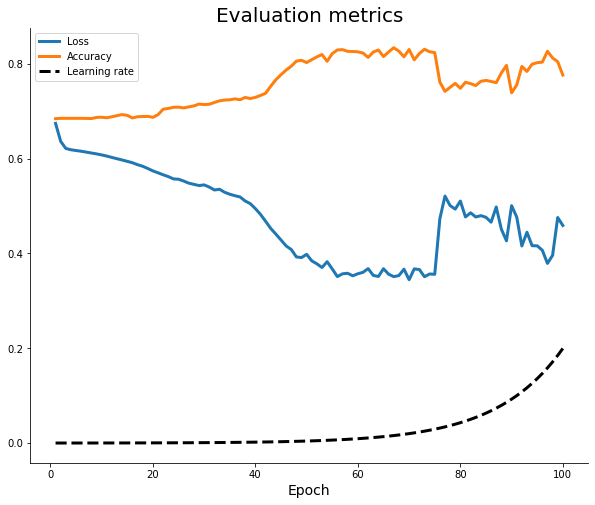

In [20]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize'] = (10, 8)
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False 

plt.plot(
    np.arange(1, 101), 
    history.history['loss'], 
    label='Loss', lw=3
)
plt.plot(
    np.arange(1, 101), 
    history.history['accuracy'], 
    label='Accuracy', lw=3
)
plt.plot(
    np.arange(1, 101), 
    history.history['lr'], 
    label='Learning rate', color='#000', lw=3, linestyle='--'
)
plt.title('Evaluation metrics', size=20)
plt.xlabel('Epoch', size=14)
plt.legend();

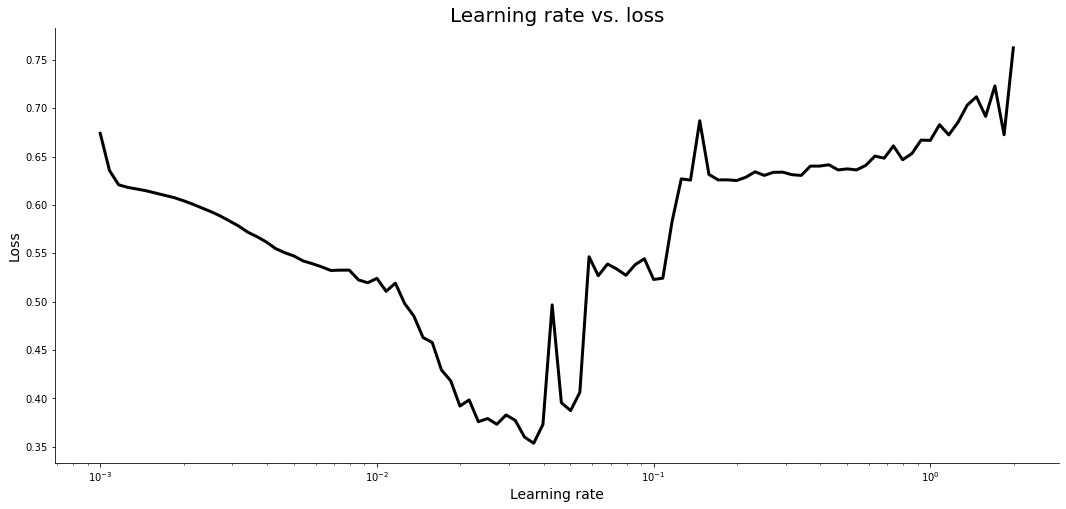

In [15]:
# Now lets choose the best learning rate for our model

learning_rates = 1e-3 * (10 ** (np.arange(100) / 30))
plt.figure(figsize=(18,8))
plt.semilogx(
    learning_rates, 
    history.history['loss'], 
    lw=3, color='#000'
)
plt.title('Learning rate vs. loss', size=20)
plt.xlabel('Learning rate', size=14)
plt.ylabel('Loss', size=14);

In [16]:
model_optimized = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_optimized.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.005),
    metrics=[
        tf.keras.metrics.BinaryAccuracy(name='accuracy')
    ]
)

history_optimized = model_optimized.fit(
    x_train,
    y_train,
    epochs=100
)

Epoch 1/100
191/191 [==============================] - 2s 5ms/step - loss: 0.6135 - accuracy: 0.6860
Epoch 2/100
191/191 [==============================] - 1s 5ms/step - loss: 0.5647 - accuracy: 0.7105
Epoch 3/100
191/191 [==============================] - 1s 5ms/step - loss: 0.5600 - accuracy: 0.7147
Epoch 4/100
191/191 [==============================] - 1s 5ms/step - loss: 0.5452 - accuracy: 0.7164
Epoch 5/100
191/191 [==============================] - 1s 5ms/step - loss: 0.5253 - accuracy: 0.7257
Epoch 6/100
191/191 [==============================] - 1s 5ms/step - loss: 0.5130 - accuracy: 0.7260
Epoch 7/100
191/191 [==============================] - 1s 5ms/step - loss: 0.4770 - accuracy: 0.7493
Epoch 8/100
191/191 [==============================] - 1s 5ms/step - loss: 0.4250 - accuracy: 0.7851
Epoch 9/100
191/191 [==============================] - 1s 5ms/step - loss: 0.3985 - accuracy: 0.8031
Epoch 10/100
191/191 [==============================] - 1s 5ms/step - loss: 0.3860 - accura

191/191 [==============================] - 2s 9ms/step - loss: 0.2464 - accuracy: 0.8842
Epoch 82/100
191/191 [==============================] - 1s 7ms/step - loss: 0.2473 - accuracy: 0.8834
Epoch 83/100
191/191 [==============================] - 1s 7ms/step - loss: 0.2265 - accuracy: 0.8922
Epoch 84/100
191/191 [==============================] - 1s 6ms/step - loss: 0.2331 - accuracy: 0.8875
Epoch 85/100
191/191 [==============================] - 1s 6ms/step - loss: 0.2275 - accuracy: 0.8926
Epoch 86/100
191/191 [==============================] - 1s 6ms/step - loss: 0.2352 - accuracy: 0.8866
Epoch 87/100
191/191 [==============================] - 1s 6ms/step - loss: 0.2430 - accuracy: 0.8865
Epoch 88/100
191/191 [==============================] - 1s 6ms/step - loss: 0.2245 - accuracy: 0.8944
Epoch 89/100
191/191 [==============================] - 1s 5ms/step - loss: 0.2324 - accuracy: 0.8950
Epoch 90/100
191/191 [==============================] - 1s 5ms/step - loss: 0.2346 - accuracy: 

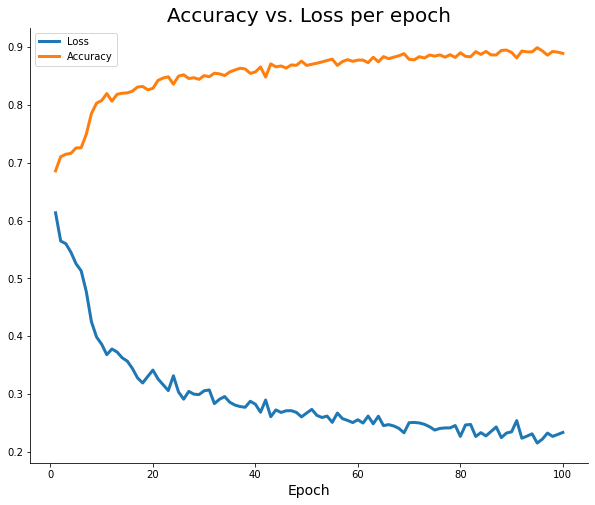

In [17]:
plt.plot(
    np.arange(1, 101), 
    history_optimized.history['loss'], 
    label='Loss', lw=3
)
plt.plot(
    np.arange(1, 101), 
    history_optimized.history['accuracy'], 
    label='Accuracy', lw=3
)
plt.title('Accuracy vs. Loss per epoch', size=20)
plt.xlabel('Epoch', size=14)
plt.legend()

In [18]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

predictions = model_optimized.predict(x_test)
prediction_classes = [1 if prob > 0.5 else 0 for prob in np.ravel(predictions)]


print(f'Accuracy on the test set: {accuracy_score(y_test, prediction_classes):.2f}')

print('Confusion matrix:')
print(confusion_matrix(y_test, prediction_classes))

48/48 [==============================] - 0s 3ms/step
Accuracy on the test set: 0.88
Confusion matrix:
[[959  88]
 [ 97 380]]
